# Huber Total Variation Denoising

We are solving the discretized version of the following minimization problem
\begin{equation}\label{L2-TV}
\min_{u} \int_{\Omega} (u-f)^{2}dx + \alpha \int_{\Omega}  \varphi_{\gamma}(\nabla u)dx
\end{equation}
were $\phi_{\gamma}:\mathbb{R}^{d}\to \mathbb{R}^{+}$ with 
\begin{equation}
\phi_{\gamma}(v)=
\begin{cases}
|v|-\frac{1}{2}\gamma & \text{ if } |v|\ge \gamma,\\
\frac{1}{2\gamma}|v(x)|^{2}& \text{ if } |v|< \gamma.\\
\end{cases}
\end{equation}

Without getting into much details, in order to solve the above minization problem, we follow the approach of [Hintermüller, Stadler (2016)](https://epubs.siam.org/doi/abs/10.1137/040613263) and we will solve the primal-dual optimality conditions:
\begin{align}
u-f-\mathrm{div}p&=0\\
\max(|\nabla u -w|,\gamma)p-\alpha \nabla u&=0
\end{align}




## Import data...

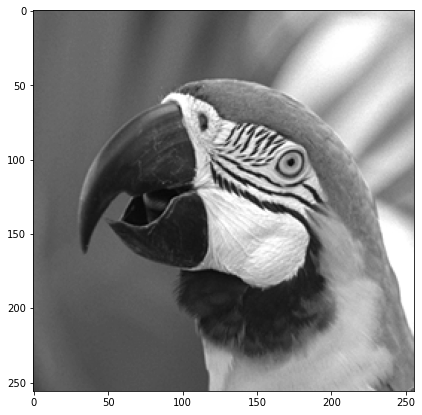

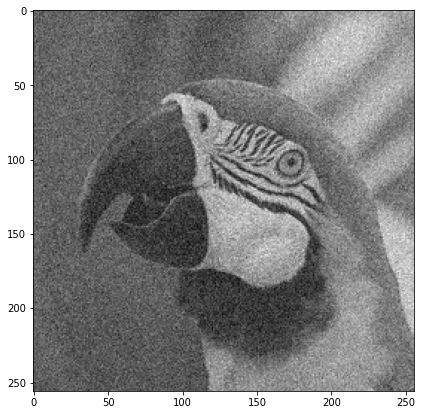

In [3]:
import scipy.io as sio
import matplotlib.pyplot as plt

mat_contents = sio.loadmat('parrot')
clean=mat_contents['parrot']
f=mat_contents['parrot_noisy_01']

plt.figure(figsize = (7,7)) 
imgplot2 = plt.imshow(clean)
imgplot2.set_cmap('gray')

plt.figure(figsize = (7,7)) 
imgplot2 = plt.imshow(f)
imgplot2.set_cmap('gray')

from TVdenoising_SSN import diff_operators, reproject, residual_optimality, TV_denoising 


## Task 1

Choose different values for $\alpha$ and $\gamma$ and interprent your results:
- Fix $\gamma$ small, e.g. $\gamma=0.0001$ and play with the values of $\alpha$. What do you observe for large $\alpha$? What for small?
- Fix $\alpha$ and play with the values of $\gamma$. What do you observe for large $\gamma$? What for small?


In [4]:
alpha=0.1

In [5]:
gamma=0.001

Newton iteration : 1 The residuals of u and p are 31.90617108187989 and  9.857488573274636e-16


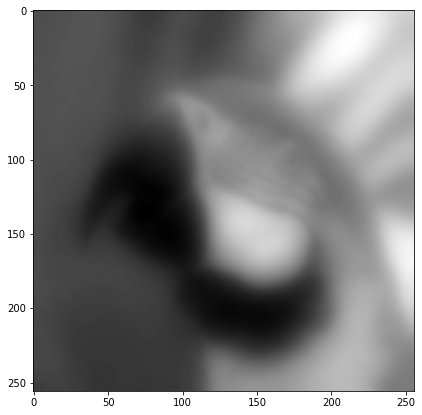

Newton iteration : 2 The residuals of u and p are 16.844185565020744 and  1.20882470401206


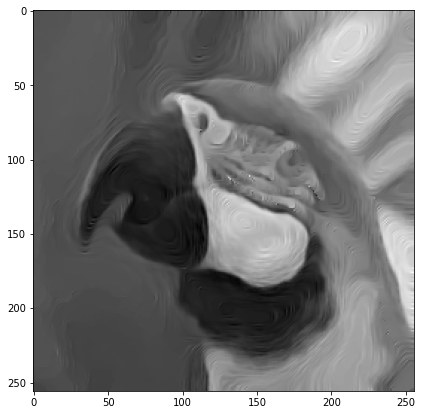

Newton iteration : 3 The residuals of u and p are 7.563840650630668 and  0.5899784504081471


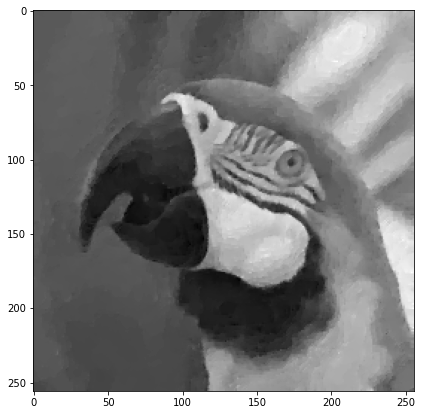

Newton iteration : 4 The residuals of u and p are 3.3818432532590967 and  0.2815218708070753


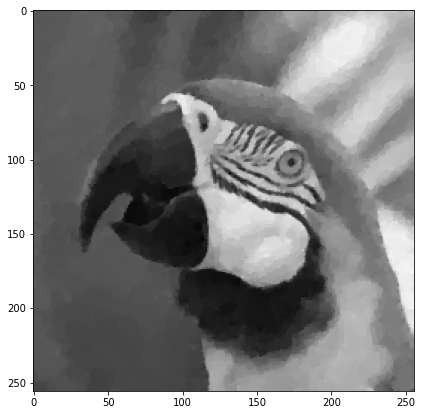

Newton iteration : 5 The residuals of u and p are 1.8136167957763512 and  0.09303432513282092


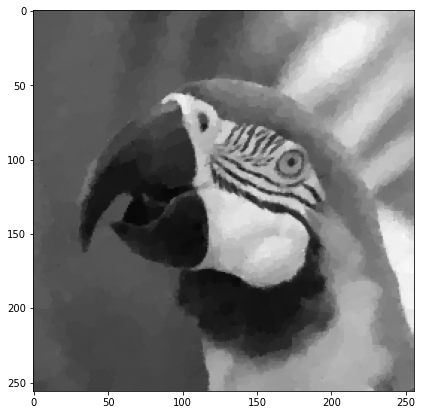

Newton iteration : 6 The residuals of u and p are 1.0226317017354307 and  0.033218614851392256


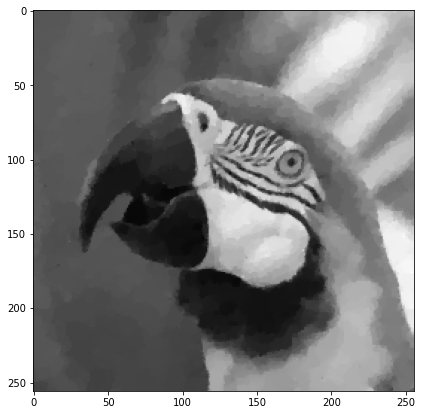

Newton iteration : 7 The residuals of u and p are 0.48112856282772826 and  0.009396792049217666


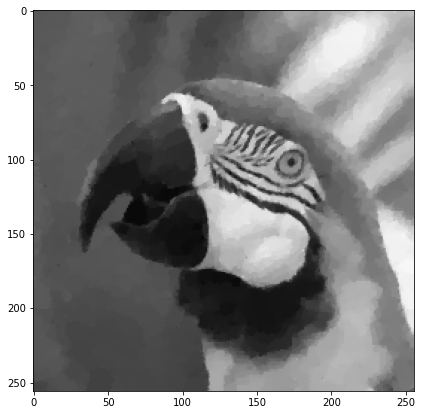

Newton iteration : 8 The residuals of u and p are 0.20540404449301353 and  0.003302997685638496


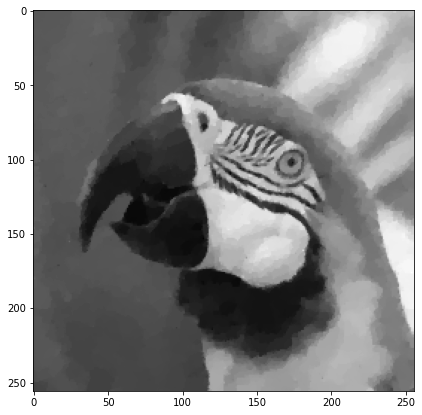

Newton iteration : 9 The residuals of u and p are 0.07358104626395344 and  0.0009954851300243031


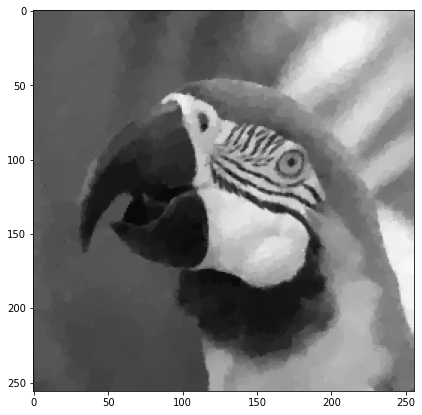

The Newton method converged


In [19]:
u =  TV_denoising(f,clean, alpha, gamma)

## Task 2

Import the following spatial dependent regularization weight:

In [24]:
weight_contents = sio.loadmat('spatial_dependent_weight')
alpha_spatial=weight_contents['alpha_spatial']

And run again the algorithm with this weight:

Newton iteration : 1 The residuals of u and p are 31.889471538594204 and  9.48272888225335e-16


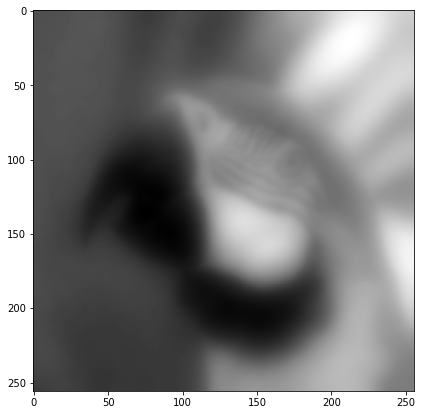

Newton iteration : 2 The residuals of u and p are 16.043991790295934 and  1.147021757306746


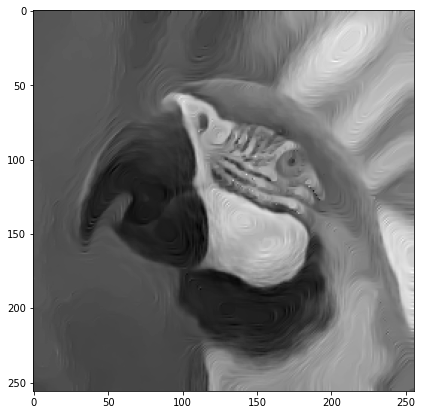

Newton iteration : 3 The residuals of u and p are 6.48250728754627 and  0.5332107620554365


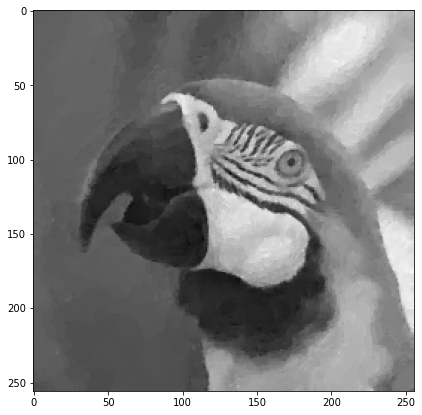

Newton iteration : 4 The residuals of u and p are 2.9502027332598297 and  0.1832802485596334


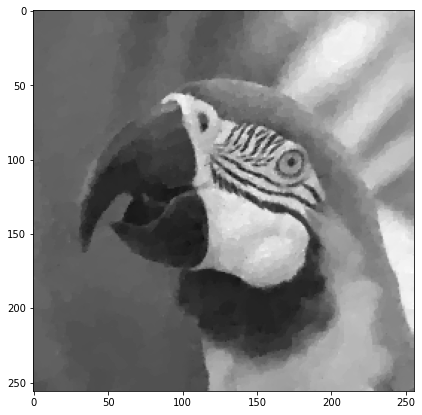

Newton iteration : 5 The residuals of u and p are 1.7033756939893634 and  0.05114926043237586


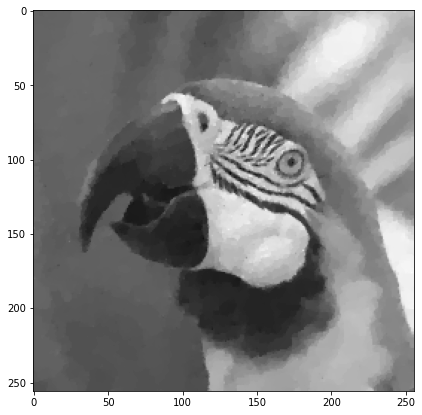

Newton iteration : 6 The residuals of u and p are 0.9605642472337501 and  0.025036890671272138


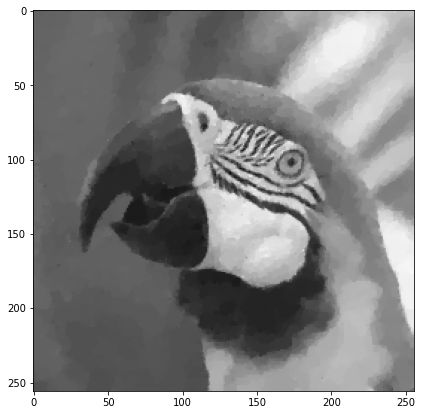

Newton iteration : 7 The residuals of u and p are 0.4649465893466526 and  0.008315787239083307


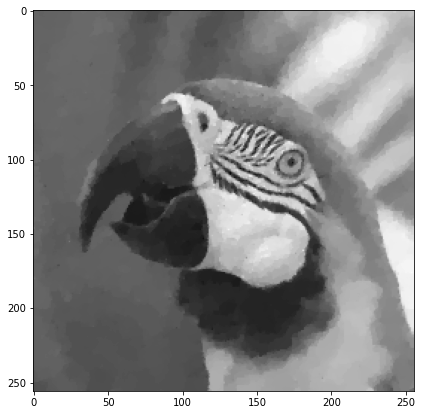

Newton iteration : 8 The residuals of u and p are 0.2098380501512582 and  0.0021543434746034346


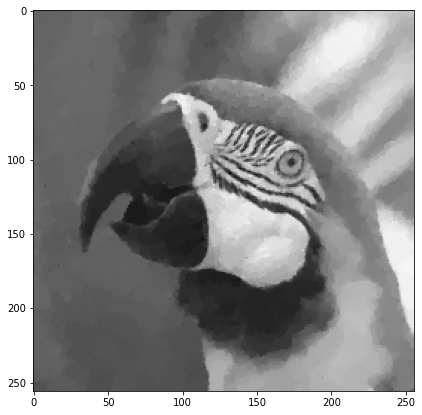

Newton iteration : 9 The residuals of u and p are 0.10811483547744022 and  0.0006171519568800247


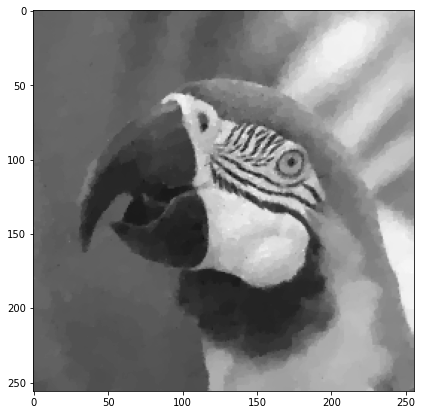

Newton iteration : 10 The residuals of u and p are 0.042935168286662745 and  0.00018253862776572335


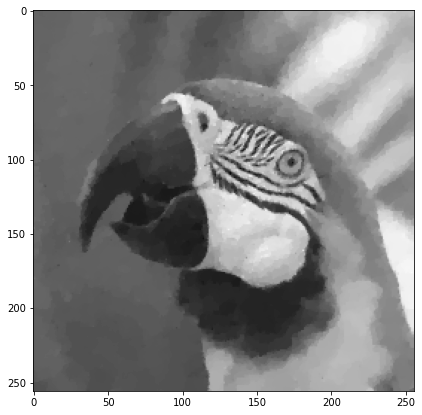

The Newton method converged


In [28]:
u =  TV_denoising(f,clean, 1.1*alpha_spatial, gamma)